## Graph Lattice and Tensile Test examples

Text(0, 0.5, 'S2 parameter')

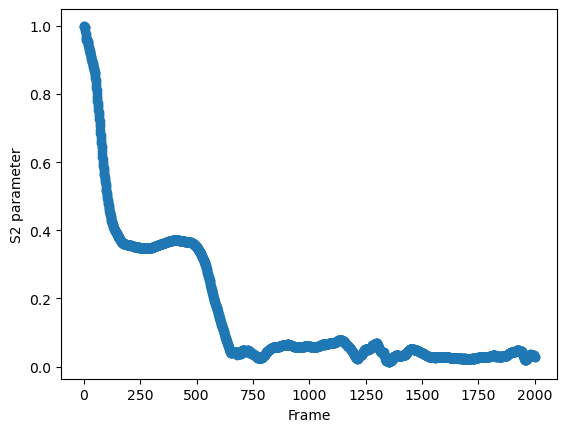

In [12]:
from nematic_order import nematic_order
import matplotlib.pyplot as plt
import numpy as np

# Lattice test
lattice_orders,director = nematic_order("/home/jbieri/CME_lab/projects/SIC/preliminary-work/pps/coarse-graining/pps-melt-cg.gsd")
plt.scatter(range(len(lattice_orders)),lattice_orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")


Text(0, 0.5, 'S2 parameter')

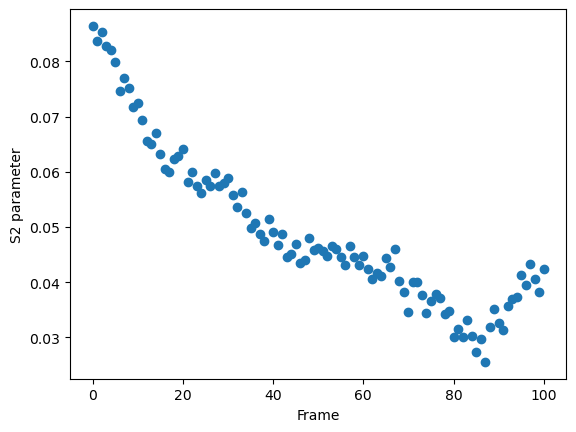

In [13]:
# Tensile test
tensile_orders,director = nematic_order("/home/jbieri/CME_lab/projects/SIC/preliminary-work/pps/coarse-graining/given-pps-cg.gsd")
plt.scatter(range(len(tensile_orders)),tensile_orders)
plt.xlabel("Frame")
plt.ylabel("S2 parameter")

## Show how to manipulate nematic order vector

## Show that bond vectors in opposite directions have the same nematic order

In [2]:
from flowermd.library import PPS, OPLS_AA_PPS, BeadSpring
import warnings
warnings.filterwarnings('ignore')
import flowermd
import hoomd
from flowermd.base import Molecule, Lattice, Simulation
from cmeutils.visualize import FresnelGSD
import gsd
import matplotlib.pyplot as plt
import numpy as np
import gsd.hoomd

cpu = hoomd.device.CPU() # So I don't get a CUDA error on local machine

molecule = PPS(num_mols=2, lengths=10)

box = Lattice(molecules=molecule, x = 2, y = 2, n = 1)
box.apply_forcefield(r_cut=2.5, force_field=OPLS_AA_PPS(), auto_scale=True,remove_charges=True, remove_hydrogens=True)

No charged group detected, skipping electrostatics.


In [3]:
box.hoomd_snapshot
hoomd_forces = box.hoomd_forcefield
hoomd_forces
lj_force = hoomd_forces[3]
cpu = hoomd.device.CPU()

In [4]:
sim = Simulation.from_system(system=box, gsd_write_freq=100, log_write_freq=100, device=cpu, gsd_file_name='small-pps-melt.gsd')

Initializing simulation state from a gsd.hoomd.Frame.


In [5]:
box.system.visualize()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
sim.run_NVT(n_steps=1e4, kT=3.0, tau_kt=1.0)
sim.flush_writers()

Step 100 of 10000; TPS: 438.19; ETA: 0.4 minutes
Step 200 of 10000; TPS: 852.58; ETA: 0.2 minutes
Step 300 of 10000; TPS: 1251.91; ETA: 0.1 minutes
Step 400 of 10000; TPS: 1631.12; ETA: 0.1 minutes
Step 500 of 10000; TPS: 1995.03; ETA: 0.1 minutes
Step 600 of 10000; TPS: 2347.13; ETA: 0.1 minutes
Step 700 of 10000; TPS: 2683.84; ETA: 0.1 minutes
Step 800 of 10000; TPS: 3012.29; ETA: 0.1 minutes
Step 900 of 10000; TPS: 3328.12; ETA: 0.0 minutes
Step 1000 of 10000; TPS: 3634.3; ETA: 0.0 minutes
Step 1100 of 10000; TPS: 3929.5; ETA: 0.0 minutes
Step 1200 of 10000; TPS: 4214.3; ETA: 0.0 minutes
Step 1300 of 10000; TPS: 4477.43; ETA: 0.0 minutes
Step 1400 of 10000; TPS: 4741.86; ETA: 0.0 minutes
Step 1500 of 10000; TPS: 4998.78; ETA: 0.0 minutes
Step 1600 of 10000; TPS: 5246.93; ETA: 0.0 minutes
Step 1700 of 10000; TPS: 5481.5; ETA: 0.0 minutes
Step 1800 of 10000; TPS: 5713.81; ETA: 0.0 minutes
Step 1900 of 10000; TPS: 5935.57; ETA: 0.0 minutes
Step 2000 of 10000; TPS: 6130.01; ETA: 0.0 min

Text(0, 0.5, 'S2 parameter')

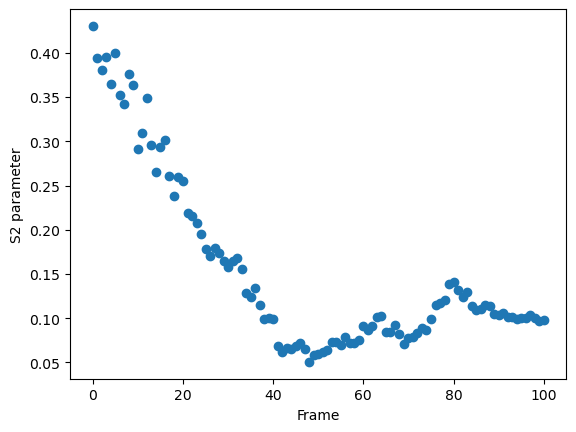

In [8]:
lattice_orders,director = nematic_order('small-pps-melt.gsd')
plt.scatter(range(len(lattice_orders)),lattice_orders)
plt.xlabel('Frame')
plt.ylabel('S2 parameter')